**<h1>Projekt – sieci neuronowe</h1>**

---



<h4>Data złożenia projektu: <b>24.04.2024 r.</b></h4>

<h4>Numer grupy projektowej: <b>1</b></h4>

<h4>Imię i nazwisko I: <b>Karol DzIadkowiec</b></h4>

<h4>Imię i nazwisko II: <b>Kamil Dziewa</b></h4>

**<h1>Predykcja cen nieruchomości w Polsce</h1>**


---



<h2>1. Opis problemu i danych.</h2>

---



<h3>Ogólny opis dziedziny, jakiej dotyczą dane</h3>

Dane dla projektu "Predykcja cen nieruchomości w Polsce" koncentrują się na gromadzeniu informacji dotyczących nieruchomości dostępnych na polskim rynku. Obejmują one różnorodne cechy i atrybuty, które mogą wpływać na wartość nieruchomości. Zmienne zawierają istotne czynniki takie jak metraż, liczba pokoi, piętro, lokalizacja (wyrażona szerokością i długością geograficzną), rok budowy itp. Analiza cen nieruchomości może być przydatna dla różnych celów, takich jak określenie wartości rynkowej nieruchomości, prognozowanie cen, podejmowanie decyzji inwestycyjnych oraz analiza trendów na rynku nieruchomości.

<h3>Link do zbioru danych</h3>

https://www.kaggle.com/datasets/dawidcegielski/house-prices-in-poland

<h3>Biblioteki</h3>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import files
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

<h3>Importowanie oraz wyświetlenie danych</h3>

In [ ]:
uploadedFile = files.upload()

Saving Houses.csv to Houses.csv


In [ ]:
data = pd.read_csv('Houses.csv', encoding='latin1')

In [ ]:
data

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
23759,23759,Stare Miasto Naramowice,Poznañ,0.0,3976.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,23760,W³ochy,Warszawa,4.0,10206.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0.0,4952.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,23762,Podgórze Duchackie Walerego S³awka,Kraków,6.0,24148.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


Ilość wczytanych rekordów: **23763**

<h3>Zmienne badanego problemu</h3>

In [ ]:
data.columns

Index(['Unnamed: 0', 'address', 'city', 'floor', 'id', 'latitude', 'longitude',
       'price', 'rooms', 'sq', 'year'],
      dtype='object')

Zmienne jakościowe: **address, city**

Zmienne ilościowe: **Unnamed: 0, floor, id, latitude, longitude, price, rooms, sq, year**

<h3>Podstawowe statystyki (min, max, średnia, odchylenie standardowe)</h3>

In [ ]:
data.describe()

,Unnamed: 0,floor,id,latitude,longitude,price,rooms,sq,year
count,23764.000000,23764.000000,23764.000000,23764.000000,23764.000000,2.376400e+04,23764.000000,2.376400e+04,23764.00000
mean,11881.500000,2.808744,15621.964484,51.374874,19.861773,6.493536e+05,2.620771,1.027249e+02,2000.55117
std,6860.220235,2.463467,8617.293898,1.099836,1.447186,5.326970e+05,0.996530,6.533688e+03,48.31402
min,0.000000,0.000000,1.000000,49.933056,4.204796,5.000000e+03,1.000000,8.800000e+00,70.00000
25%,5940.750000,1.000000,8420.750000,50.066489,19.916563,4.115461e+05,2.000000,4.200000e+01,1985.00000
50%,11881.500000,2.000000,15637.500000,52.193987,19.999330,5.200000e+05,3.000000,5.389500e+01,2019.00000
75%,17822.250000,4.000000,23111.250000,52.267594,20.996180,6.999990e+05,3.000000,6.891500e+01,2021.00000
max,23763.000000,10.000000,30308.000000,54.435238,30.319403,1.500000e+07,10.000000,1.007185e+06,2980.00000


<h2>2. Obróbka Danych.</h2>

---



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23764 entries, 0 to 23763
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23764 non-null  int64  
 1   address     23764 non-null  object 
 2   city        23764 non-null  object 
 3   floor       23764 non-null  float64
 4   id          23764 non-null  float64
 5   latitude    23764 non-null  float64
 6   longitude   23764 non-null  float64
 7   price       23764 non-null  float64
 8   rooms       23764 non-null  float64
 9   sq          23764 non-null  float64
 10  year        23764 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
data.isnull().sum()

Unnamed: 0    0
address       0
city          0
floor         0
id            0
latitude      0
longitude     0
price         0
rooms         0
sq            0
year          0
dtype: int64

Arkusz danych nie zawiera pustych komórek oraz brakujących danych.

<h3>Wyświetlenie wczytanych rekordów na mapie</h3>

In [ ]:
fig = px.scatter_mapbox(data, lat='latitude', lon='longitude', hover_name='id', hover_data=['price', 'sq'], zoom=4)
fig.update_layout(mapbox_style='carto-positron',margin={'r': 10, 't': 10, 'l': 10, 'b': 10})
fig.show()

Kilka wczytanych rekordów pochodzi spoza Polski, zatem usunięto niepasujące do badanego problemu dane:

In [ ]:
housesToRemove = [3906, 5586, 12804, 21692, 22777]
data = data[~data.iloc[:, 0].isin(housesToRemove)]
data.to_csv('Houses.csv', index=False)

Ponowne wyświetlenie mapy wczytanych rekordów:



In [ ]:
fig = px.scatter_mapbox(data, lat='latitude', lon='longitude', hover_name='id', hover_data=['price', 'sq'], zoom=4)
fig.update_layout(mapbox_style='carto-positron',margin={'r': 10, 't': 10, 'l': 10, 'b': 10})
fig.show()

Wyświetlenie miast dla badanego problemu:

In [ ]:
data['city'].value_counts()

city
Warszawa    9850
Kraków      9760
Poznañ      4149
Name: count, dtype: int64

Korekta nazwy miast dla Krakowa oraz Poznania:

In [ ]:
data.loc[data['city'] == 'Kraków', 'city'] = 'Krakow'
data.loc[data['city'] == 'Poznañ', 'city'] = 'Poznan'

In [ ]:
data['city'].value_counts()

city
Warszawa    9850
Krakow      9760
Poznan      4149
Name: count, dtype: int64

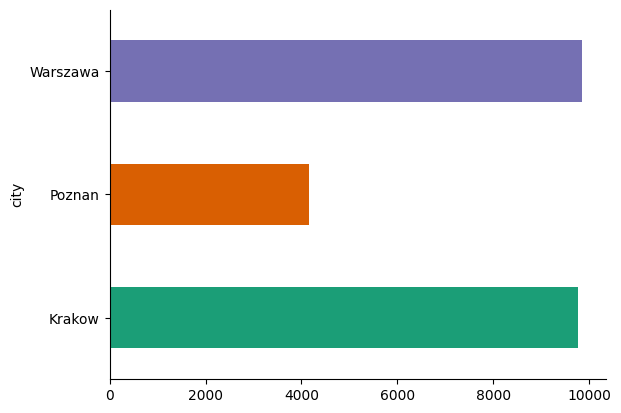

In [ ]:
# @title Zestawienie miast

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Usunięcie zbędnej kolumny, stanowiącej ID dla rekordu:

In [ ]:
data = data.drop('Unnamed: 0', axis=1)

Zmiana typów dla zmiennych *floor*, *id*, *price*, *rooms*, *year*:

In [ ]:
data.loc[:, 'floor'] = data['floor'].astype(int)
data.loc[:, 'id'] = data['id'].astype(int)
data.loc[:, 'price'] = data['price'].astype(int)
data.loc[:, 'rooms'] = data['rooms'].astype(int)
data.loc[:, 'year'] = data['year'].astype(int)

<h3>Inżynieria cech</h3>

Przekształcenie danych dotyczących nieruchomości, obliczając cenę za metr kwadratowy oraz metraż na pokój oraz konwersja obliczonych wartości na liczby całkowite:

In [ ]:
data['price_per_sq_meter'] = data['price'] / data['sq']
data['price_per_sq_meter'] = data['price_per_sq_meter'].astype(int)
data['sq_meter_per_room'] = data['sq'] / data['rooms']
data['sq_meter_per_room'] = data['sq_meter_per_room'].astype(int)

**Histogram ceny za metr kwadratowy:**

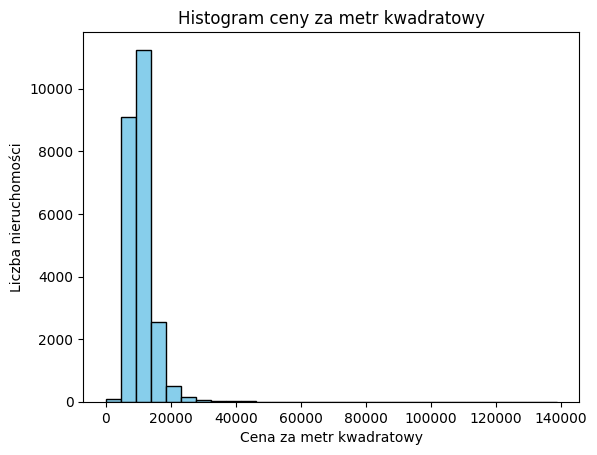

In [ ]:
plt.hist(data['price_per_sq_meter'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Cena za metr kwadratowy')
plt.ylabel('Liczba nieruchomości')
plt.title('Histogram ceny za metr kwadratowy')
plt.show()

**Wykres rozproszenia: Cena za metr kwadratowy vs. Metraż:**

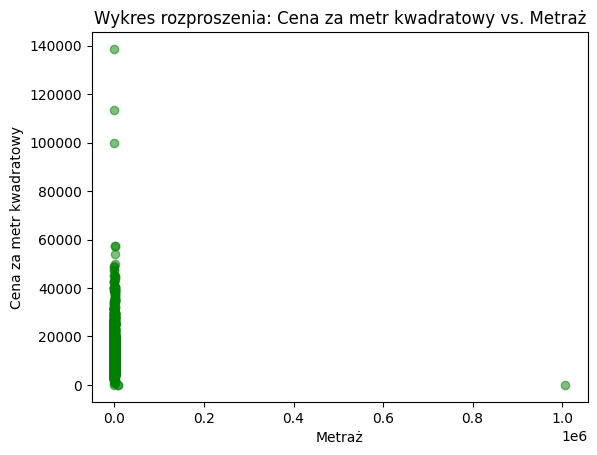

In [ ]:
plt.scatter(data['sq'], data['price_per_sq_meter'], color='green', alpha=0.5)
plt.xlabel('Metraż')
plt.ylabel('Cena za metr kwadratowy')
plt.title('Wykres rozproszenia: Cena za metr kwadratowy vs. Metraż')
plt.show()

**Wykres ramka-wąsy ceny za metr kwadratowy w poszczególnych miastach:**

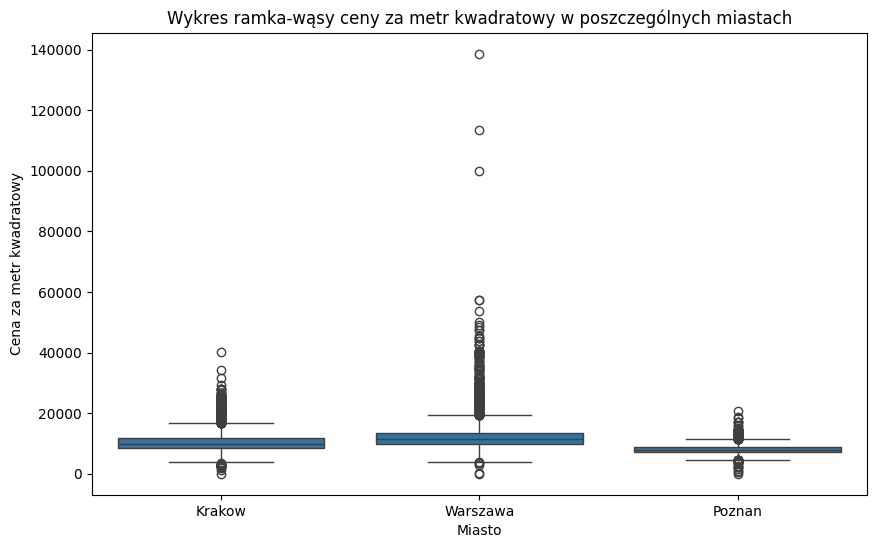

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='price_per_sq_meter', data=data)
plt.xlabel('Miasto')
plt.ylabel('Cena za metr kwadratowy')
plt.title('Wykres ramka-wąsy ceny za metr kwadratowy w poszczególnych miastach')
plt.show()

**Wykres średniej ceny za metr kwadratowy w zależności od roku budowy:**

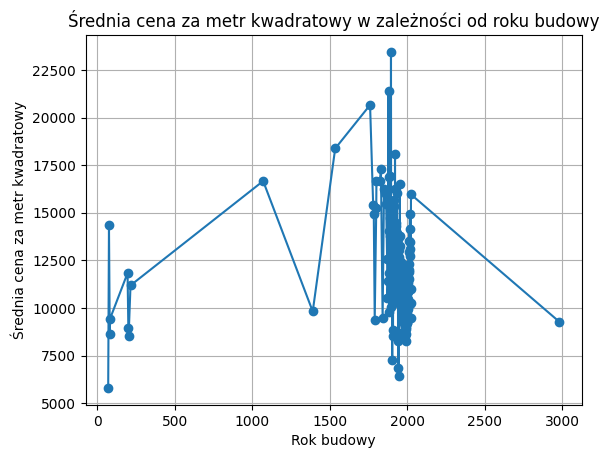

In [ ]:
avg_price_per_sq_meter = data.groupby('year')['price_per_sq_meter'].mean()
plt.plot(avg_price_per_sq_meter.index, avg_price_per_sq_meter.values, marker='o', linestyle='-')
plt.xlabel('Rok budowy')
plt.ylabel('Średnia cena za metr kwadratowy')
plt.title('Średnia cena za metr kwadratowy w zależności od roku budowy')
plt.grid(True)
plt.show()

**Macierz korelacji:**

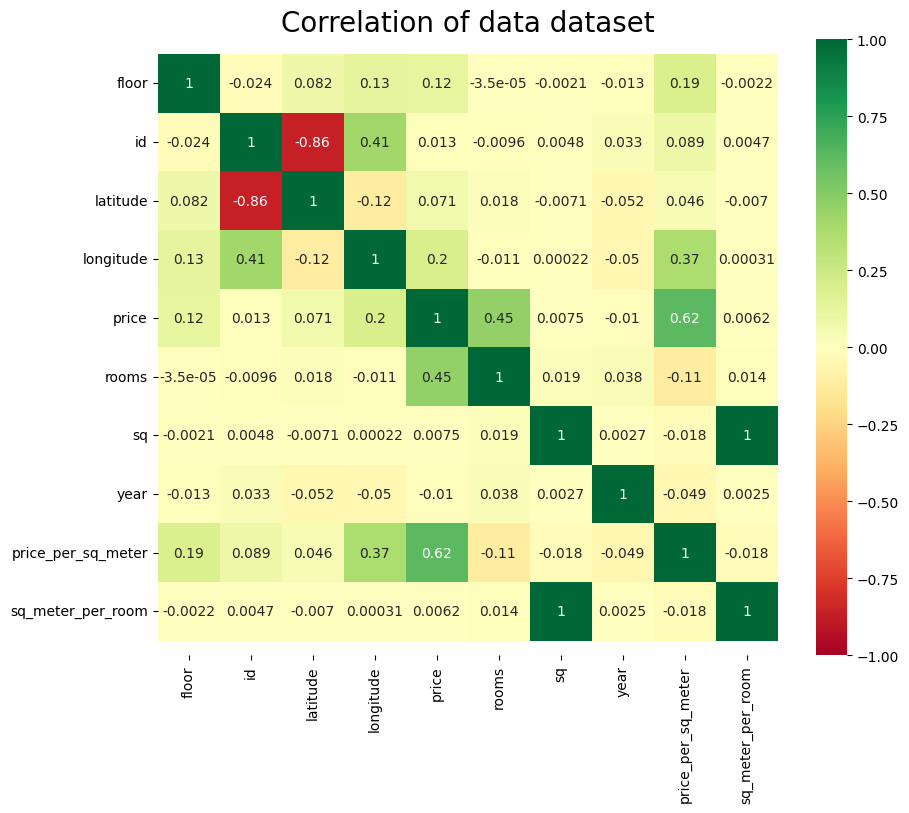

In [ ]:
plt.figure(figsize=(10, 8))
numerical_data = data.select_dtypes(include=[np.number])

ax = sns.heatmap(numerical_data.corr(),
                 xticklabels=numerical_data.corr().columns,
                 yticklabels=numerical_data.corr().columns,
                 cmap='RdYlGn',
                 vmin=-1, vmax=1,
                 annot=True, center=0)

plt.title('Correlation of data dataset', fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Usunięcie outlinerów - eliminacja nietypowych lub nieprawidłowych danych, które mogą zakłócać analizę.

In [ ]:
data = data[(data['sq'] < data['sq'].quantile(0.999)) & (data['sq'] > data['sq'].quantile(0.001))]
data = data[(data['year'] < data['year'].quantile(0.999)) & (data['year'] > data['year'].quantile(0.001))]
data = data[(data['price_per_sq_meter'] < data['price_per_sq_meter'].quantile(0.999)) & (data['price_per_sq_meter'] > data['price_per_sq_meter'].quantile(0.001))]
data = data[(data['longitude'] >= 16.85) & (data['longitude'] <= 21.25)]
data = data[(data['latitude'] <= 52.47)]

W kontekście kodu usunięto outlinery dla zmiennych:

* **sq**: usunięto rekordy, których wartość pola sq jest poniżej 0.1% lub
powyżej 99.9% kwantyla danych, co pozwala usunąć bardzo małe i bardzo duże wartości, które mogą być nietypowe w zbiorze danych.

* **year**: usunięto rekordy, których wartość pola year jest poniżej 0.1% lub powyżej 99.9% kwantyla danych, co pozwala usunąć bardzo stare lub bardzo nowe wartości, które mogą być nietypowe.

* **price_per_sq_meter**: usunięto rekordy, których wartość pola price_per_sq_meter jest poniżej 0.1% lub powyżej 99.9% kwantyla danych, co pozwala usunąć bardzo niskie lub bardzo wysokie ceny za metr kwadratowy, które mogą być nietypowe.

* **longitude**: usunięto rekordy, których wartość pola longitude jest poza zakresem od 16.85 do 21.25 stopni, co pozwala usunąć dane z obszarów poza tym zakresem geograficznym.

* **latitude**: usunięto rekordy, których wartość pola latitude jest powyżej 52.47 stopni, co pozwala usunąć dane z obszarów poza tym zakresem geograficznym.

Kodowanie kategorii:

In [ ]:
data = pd.get_dummies(data, columns=['city'])

Funkcja *pd.get_dummies()* tworzy trzy nowe kolumny: "city_Krakow", "city_Poznan", "city_Warszawa". Jeśli dany wiersz zawiera wartość "Krakow" w kolumnie "city", to w kolumnie "city_Krakow" będzie wartość 1, a w pozostałych kolumnach wartości będą wynosić 0. To samo dotyczy pozostałych wartości "Poznan" i "Warszawa".

Kodowanie kategorii jest niezbędne w przypadku zastosowania algorytmów uczenia maszynowego, które wymagają danych numerycznych, a nie kategorycznych. Dzięki tej technice algorytmy mogą łatwiej przetwarzać dane kategoryczne i osiągać lepsze wyniki.

<h3>Podział danych na wejściowe oraz wyjściowe</h3>

<h3>Docelowe zmienne wejściowe</h3>

* Zmienne ilościowe: **floor, latitude, longitude, rooms, sq, year, city_Krakow, city_Poznan, city_Warszawa**
* Zmienne jakościowe: **-**

<h3>Docelowa zmienna wyjściowa</h3>

* **price** (zmienna ilościowa)

In [ ]:
X = data[['floor', 'latitude', 'longitude', 'rooms', 'sq', 'year', 'city_Krakow', 'city_Poznan', 'city_Warszawa']]
y = data['price']

**Wyświetlenie gotowych do treningu danych:**

In [ ]:
X

,floor,latitude,longitude,rooms,sq,year,city_Krakow,city_Poznan,city_Warszawa
0,2.0,50.049224,19.970379,3.0,74.05,2021.0,True,False,False
1,3.0,52.249775,21.106886,1.0,24.38,2021.0,False,False,True
2,2.0,50.066964,19.920025,2.0,37.00,1970.0,True,False,False
3,2.0,52.404212,16.882542,5.0,166.00,1935.0,False,True,False
4,1.0,52.212225,20.972630,5.0,105.00,2020.0,False,False,True
...,...,...,...,...,...,...,...,...,...
23759,0.0,52.449649,16.949408,4.0,77.00,2020.0,False,True,False
23760,4.0,52.186109,20.948438,3.0,71.00,2017.0,False,False,True
23761,0.0,52.397345,16.961939,3.0,50.67,2022.0,False,True,False
23762,6.0,50.024231,19.959569,2.0,38.86,2021.0,True,False,False


In [ ]:
y

0         749000.0
1         240548.0
2         427000.0
3        1290000.0
4         996000.0
           ...    
23759     543000.0
23760     910000.0
23761     430695.0
23762     359000.0
23763     604800.0
Name: price, Length: 23281, dtype: float64

Standaryzacja danych (aby dane miały średnią równą 0 i odchylenie standardowe równie 1):

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Proces standaryzacji wykonano w 2 etapach:

* Najpierw obliczane są wartości średnie i odchylenia standardowe dla każdej cechy w danych treningowych (*X_train*) za pomocą metody *fit()*. Te wartości są używane później do standaryzacji danych.

* Następnie dane treningowe są przekształcane (standaryzowane) za pomocą metody *transform()*, która odejmuje średnią od każdej wartości i dzieli przez odchylenie standardowe.

<h3>Histogram dla zmiennej wyjściowej</h3>



<Axes: xlabel='price', ylabel='Count'>

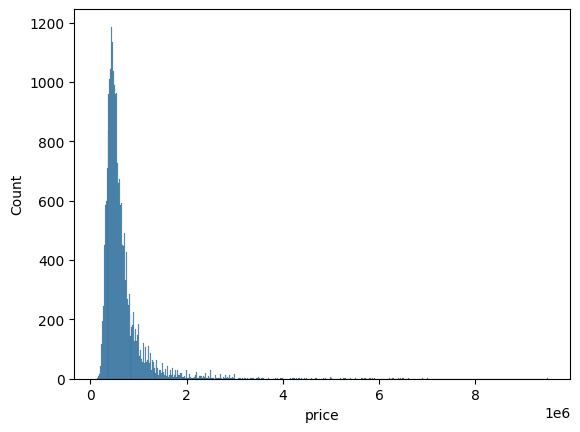

In [ ]:
sns.histplot(data['price'])

<h3>Wykres ramka-wąsy dla zmiennej wyjściowej - price</h3>

<Axes: ylabel='price'>

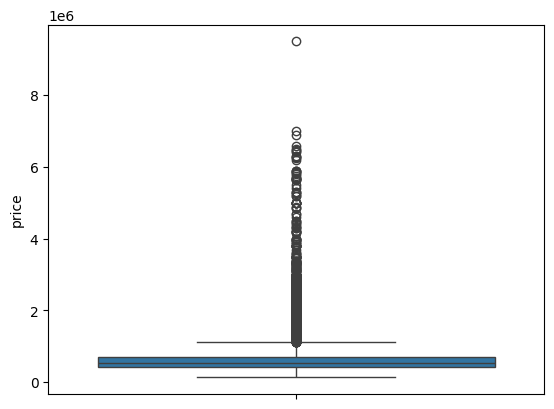

In [ ]:
sns.boxplot(y=data['price'])

<h3>Określenie rozwiązywanego problemu</h3>

Rozwiązywany problem w tym przypadku to **regresja**. Celem jest przewidywanie cen nieruchomości na podstawie różnych cech, takich jak lokalizacja, liczba pokoi, metraż, rok budowy itp. W regresji staramy się znaleźć zależność między zmiennymi niezależnymi (cechami) a zmienną zależną (cena) w celu przewidzenia wartości numerycznej, czyli ceny nieruchomości. Działając na danych dotyczących nieruchomości, regresja ma na celu zrozumienie, jak poszczególne cechy wpływają na cenę nieruchomości i umożliwienie dokonywania przewidywań cen dla nowych danych.

<h3>Podział danych na zbiór treningowy(uczący) i testowy</h3>


Dane zostały podzielone na zbiór **treningowy**(uczący) oraz **testujący** za pomocą funkcji *train_test_split*. Parametr **test_size=0.25** oznacza, że **25%** danych zostało przydzielone do zbioru testowego, a **75%** danych zostało przydzielone do zbioru uczącego. Dodatkowo, ustawienie **random_state=42** zapewnia, że podział danych będzie deterministyczny, co oznacza, że przy każdym uruchomieniu kodu podział będzie taki sam, co ułatwia porównywanie wyników.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<h2>3. Opis zastosowanych sieci neuronowych. </h2>

---



* *Typ sieci:* Sieć neuronowa typu **Feedforward** (jednokierunkowa), wykorzystywana w regresji.

* *Architektura sieci:* **5 różnych architektur sieci neuronowych**, z których każda składa się z warstw gęstych. Każdy model różni się liczbą warstw oraz liczbą neuronów w każdej z warstw.

* *Ilość epok uczenia:* Każdy model jest trenowany przez **100 epok**.

* *Sposób uczenia sieci:* Sieć jest uczona za pomocą optymalizatora **Adam**, który dostosowuje współczynniki wag sieci w celu minimalizacji funkcji błędu średniokwadratowego (**MSE**). Funkcja błędu wykorzystana do treningu to **MSE** (Mean Squared Error), a jako metryka oceny wykorzystane są również **MAE** (Mean Absolute Error) oraz **R2 Score**.

* *Wykorzystany framework:* Biblioteka **Keras**, która jest częścią biblioteki **TensorFlow**, do budowy i trenowania sieci neuronowych.

Poniższy kod zawiera **5** różnych architektur sieci neuronowych, oznaczonych jako **Model 1, Model 2, Model 3, Model 4 i Model 5**. Każdy z tych modeli jest zdefiniowany za pomocą warstw gęstych (*ang. Dense*) i może mieć różną liczbę neuronów oraz wykorzystywać techniki regularyzacji, takie jak *Dropout*. Architektury te różnią się liczbą warstw oraz liczbą neuronów w każdej z warstw.

Definicja 5 różnych architektur sieci neuronowych:

In [ ]:
models = []

**Model 1:**

Model typu **Sequential**, co oznacza, że warstwy są układane jeden po drugim w sekwencji. Składa się z **3 warstw gęstych**. Pierwsza i druga warstwa mają po **64 neurony i aktywację ReLU**, co oznacza, że stosuje funkcję nieliniową **ReLU** (Rectified Linear Unit) na swoich wyjściach. Trzecia warstwa ma **1 neuron**, co sugeruje, że model przewiduje jedną wartość wyjściową.

In [ ]:
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
models.append(model1)

**Model 2:**

Model typu **Sequential**, składający się z **4 warstw gęstych**. Pierwsza i druga warstwa mają po **128 neuronów i aktywację ReLU**(stosuje funkcję nieliniową ReLU na swoich wyjściach). Trzecia warstwa ma **64 neurony z aktywacją ReLU**. Czwarta warstwa ma **1 neuron**.

In [ ]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
models.append(model2)

**Model 3:**


Model typu **Sequential**, składający się z **3 warstw gęstych**. Pierwsza i druga warstwa mają po **64 neurony i aktywację ReLU** (stosuje funkcję nieliniową ReLU na swoich wyjściach). Trzecia warstwa jest warstwą **dropout z wartością 0.2**, co oznacza, że losowo wyłącza **20%** neuronów podczas treningu w celu zapobiegania nadmiernemu dopasowaniu (**overfitting**). Ostatnia warstwa ma 1 neuron.

In [ ]:
model3 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
models.append(model3)

**Model 4:**

Model typu **Sequential**, składający się z **4 warstw gęstych**. Pierwsza warstwa ma **64 neurony z aktywacją ReLU**, druga warstwa ma **128 neuronów również z aktywacją ReLU**, trzecia warstwa ma **64 neurony z aktywacją ReLU**, a czwarta warstwa ma **1 neuron** bez żadnej aktywacji.

In [ ]:
model4 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
models.append(model4)

**Model 5:**

Model typu **Sequential**, składający się z **5 warstw gęstych**. Pierwsza cztery warstwy mają **64 neurony z aktywacją ReLU**. Piąta warstwa ma **1 neuron** bez żadnej aktywacji.

In [ ]:
model5 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
models.append(model5)

<h2>4. Dyskusja wyników oraz wnioski.  </h2>

---



Dla każdego modelu kompilacja, trenowanie, ocenienie i wydruk wyników:

Model 1
182/182 [==============================] - 0s 1ms/step

ZBIÓR TRENINGOWY(UCZĄCY):
Średnia wartość bezwzględna róznicy(MAE) 133382.21875
Średnia wartość kwadratu różnicy(MSE): 67452256256.0
Średni błąd modelu(RMSE): 259715.7220038864
Współczynnik determinacji(R2): 0.6799250734982716

ZBIÓR TESTUJĄCY:
Średnia wartość bezwzględna róznicy(MAE) 131144.328125
Średnia wartość kwadratu różnicy(MSE): 65625067520.0
Średni błąd modelu(RMSE):: 256173.9009345019
Współczynnik determinacji(R2): 0.7059435631757701


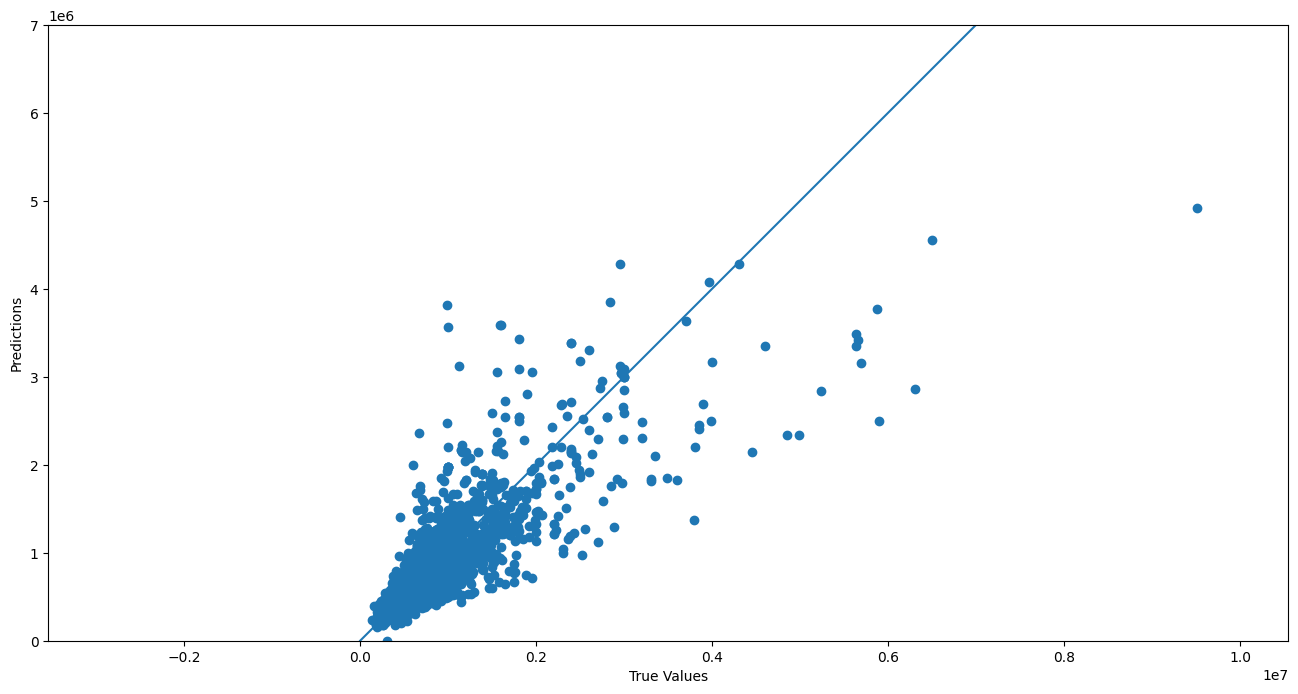

Model 2
182/182 [==============================] - 0s 2ms/step

ZBIÓR TRENINGOWY(UCZĄCY):
Średnia wartość bezwzględna róznicy(MAE) 127108.5625
Średnia wartość kwadratu różnicy(MSE): 60705611776.0
Średni błąd modelu(RMSE): 246385.0883799586
Współczynnik determinacji(R2): 0.7119394830095441

ZBIÓR TESTUJĄCY:
Średnia wartość bezwzględna róznicy(MAE) 125159.0859375
Średnia wartość kwadratu różnicy(MSE): 58691358720.0
Średni błąd modelu(RMSE):: 242262.99494557563
Współczynnik determinacji(R2): 0.7370125469520319


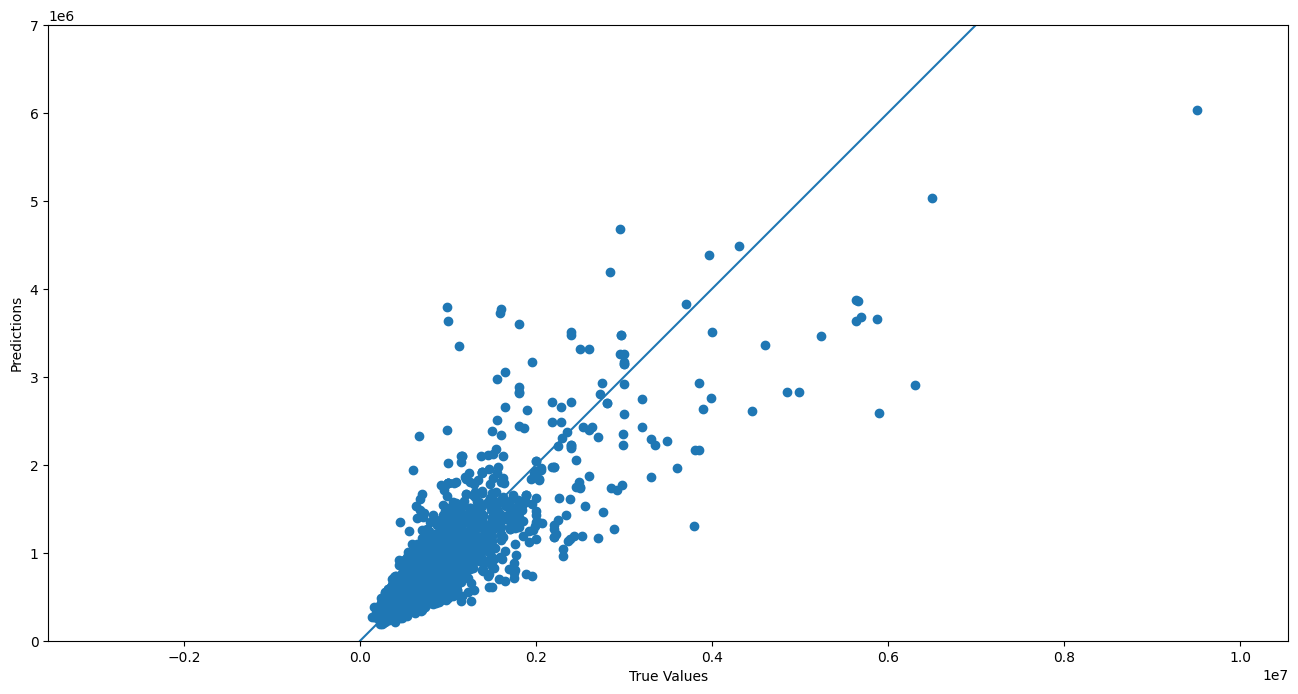

Model 3
182/182 [==============================] - 0s 2ms/step

ZBIÓR TRENINGOWY(UCZĄCY):
Średnia wartość bezwzględna róznicy(MAE) 132783.75
Średnia wartość kwadratu różnicy(MSE): 67626471424.0
Średni błąd modelu(RMSE): 260050.90160197485
Współczynnik determinacji(R2): 0.6790983662673938

ZBIÓR TESTUJĄCY:
Średnia wartość bezwzględna róznicy(MAE) 130958.796875
Średnia wartość kwadratu różnicy(MSE): 65878700032.0
Średni błąd modelu(RMSE):: 256668.46325951305
Współczynnik determinacji(R2): 0.7048071599283495


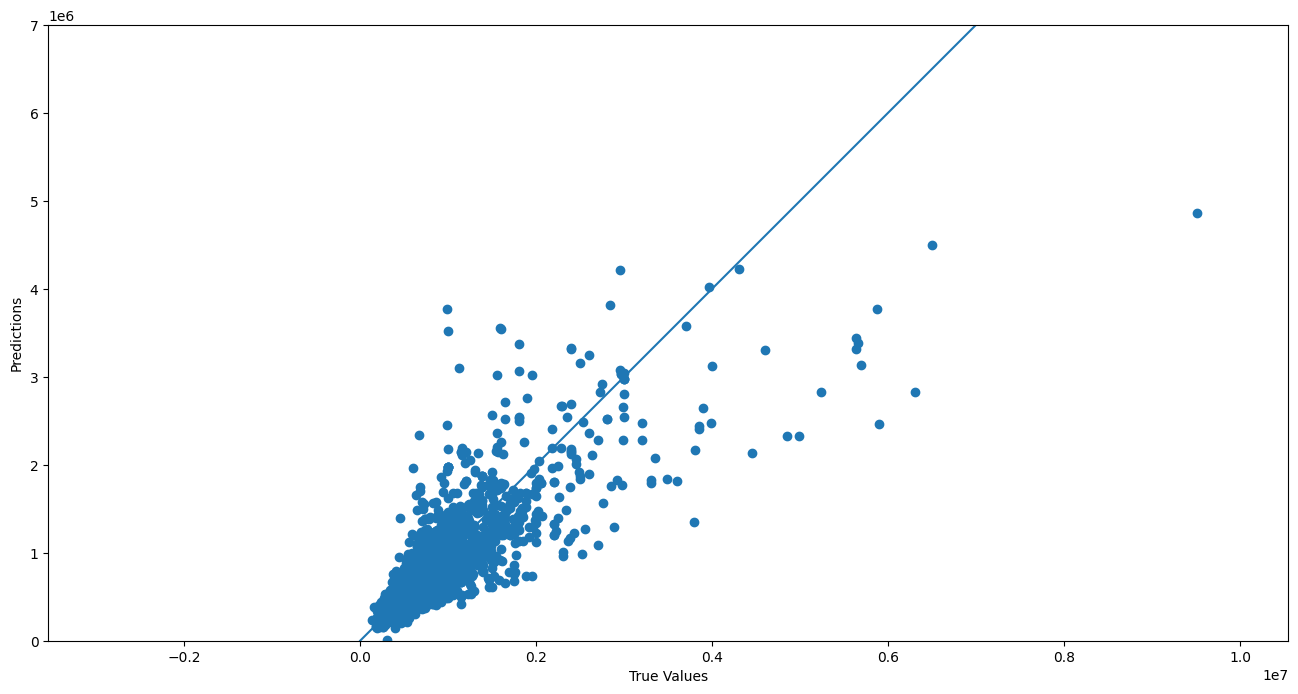

Model 4
182/182 [==============================] - 0s 2ms/step

ZBIÓR TRENINGOWY(UCZĄCY):
Średnia wartość bezwzględna róznicy(MAE) 126462.9453125
Średnia wartość kwadratu różnicy(MSE): 61010079744.0
Średni błąd modelu(RMSE): 247002.18570692852
Współczynnik determinacji(R2): 0.7104945113348253

ZBIÓR TESTUJĄCY:
Średnia wartość bezwzględna róznicy(MAE) 124352.7578125
Średnia wartość kwadratu różnicy(MSE): 59110133760.0
Średni błąd modelu(RMSE):: 243125.7570887955
Współczynnik determinacji(R2): 0.7351361058748898


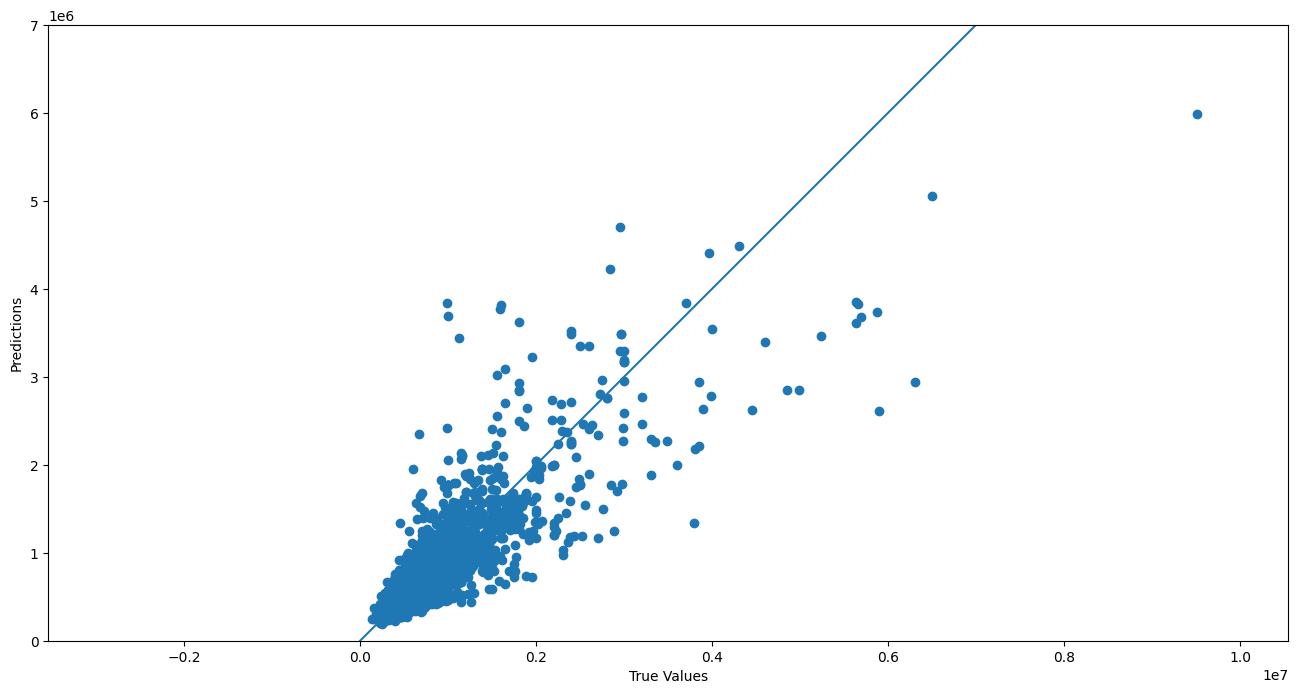

Model 5
182/182 [==============================] - 0s 2ms/step

ZBIÓR TRENINGOWY(UCZĄCY):
Średnia wartość bezwzględna róznicy(MAE) 123051.4453125
Średnia wartość kwadratu różnicy(MSE): 56869249024.0
Średni błąd modelu(RMSE): 238472.74272754948
Współczynnik determinacji(R2): 0.7301435949288448

ZBIÓR TESTUJĄCY:
Średnia wartość bezwzględna róznicy(MAE) 121221.3515625
Średnia wartość kwadratu różnicy(MSE): 53265031168.0
Średni błąd modelu(RMSE):: 230792.18177399336
Współczynnik determinacji(R2): 0.7613271683648691


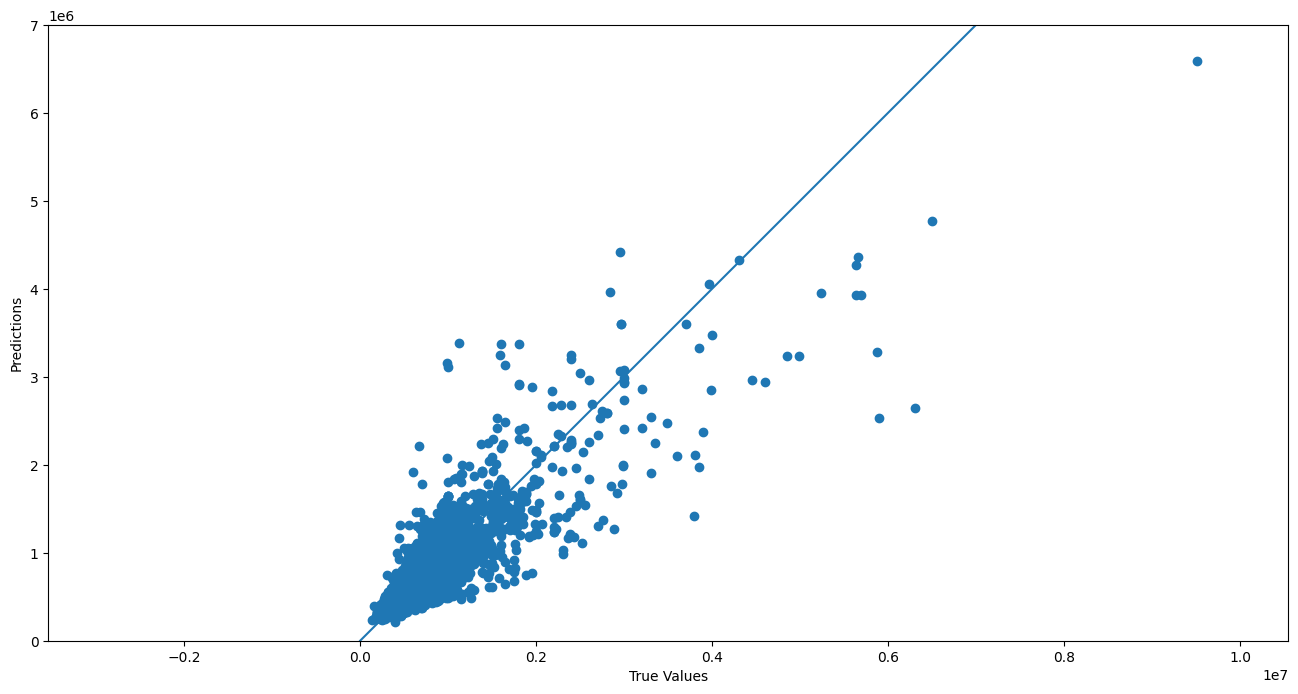

In [ ]:
for i, model in enumerate(models, start=1):
    print(f'Model {i}')

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    loss_train, mae_train = model.evaluate(X_train, y_train, verbose=0)
    loss_test, mae_test = model.evaluate(X_test, y_test, verbose=0)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("\nZBIÓR TRENINGOWY(UCZĄCY):")
    print('Średnia wartość bezwzględna róznicy(MAE)', mae_train)
    print('Średnia wartość kwadratu różnicy(MSE):', loss_train)
    print('Średni błąd modelu(RMSE):', np.sqrt(loss_train))
    print("Współczynnik determinacji(R2):", r2_score(y_train, y_pred_train))

    print("\nZBIÓR TESTUJĄCY:")
    print('Średnia wartość bezwzględna róznicy(MAE)', mae_test)
    print('Średnia wartość kwadratu różnicy(MSE):', loss_test)
    print('Średni błąd modelu(RMSE)::', np.sqrt(loss_test))
    print("Współczynnik determinacji(R2):", r2_score(y_test, y_pred_test))

    plt.figure(figsize=(16, 8))
    plt.scatter(y_test, y_pred_test)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.xlim(0, 7000000)
    plt.ylim(0, 7000000)
    _ = plt.plot([0, 7000000], [0, 7000000])
    plt.show()

<h3>Wybrane miary</h3>

Wybrane miary to **MAE, MSE, RMSE i R2 Score**, ponieważ zapewniają różnorodne informacje na temat wydajności modelu. Wykorzystanie tych miar, pozwala lepiej zrozumieć, jak dobrze nasz model radzi sobie z przewidywaniem wartości w danych.

* **Mean Absolute Error (MAE):** dostarcza średnią wartość bezwzględnej różnicy między przewidywaniami a rzeczywistymi wartościami. Jest to prosta i łatwa do zrozumienia miara, która daje jasny obraz o przeciętnym błędzie modelu.

* **Mean Squared Error (MSE):** umożliwia lepsze zrozumienie rozkładu błędów i ich wpływu na jakość modelu.

* **Root Mean Squared Error (RMSE):** pozwala lepiej zrozumieć skalowanie błędów w oryginalnych jednostkach. Dzięki temu łatwiej jest interpretować, jak błędy modelu przekładają się na rzeczywiste wartości danych.

* **R2 Score:** używane do oceny dopasowania modelu do danych. Daje informację o tym, jak wiele zmienności w danych jest wyjaśnione przez model. Wysoki wynik R2 oznacza, że model dobrze przewiduje zmienność danych, co jest istotne dla oceny jakości modelu.

<h3>Zestawienie wyników sieci neuronowych</h3>

* **Model 1:**
  * **Zbiór treningowy:**
    * MAE: 133382.21875
    * MSE: 67452256256.0
    * RMSE: 259715.7220038864
    * R2: 0.6799250734982716
  * **Zbiór testowy:**
    * MAE: 131144.328125
    * MSE: 65625067520.0
    * RMSE: 256173.9009345019
    * R2: 0.7059435631757701

  Model 1 ma umiarkowanie wysokie błędy (MAE, MSE, RMSE) i umiarkowanie wysoki współczynnik determinacji (R2) na obu zbiorach, co oznacza, że dobrze wyjaśnia zmienność danych, ale może być poprawiony, aby zmniejszyć błędy.

* **Model 2:**
  * **Zbiór treningowy:**
    * MAE: 127108.5625
    * MSE: 60705611776.0
    * RMSE: 246385.0883799586
    * R2: 0.7119394830095441
  * **Zbiór testowy:**
    * MAE: 125159.0859375
    * MSE: 58691358720.0
    * RMSE: 242262.99494557563
    * R2: 0.7370125469520319

  Model 2 wykazuje lepsze wyniki niż Model 1, z mniejszymi błędami i wyższym R2 na obu zbiorach. Wydaje się być bardziej satysfakcjonujący.

* **Model 3:**
  * **Zbiór treningowy:**
    * MAE: 132783.75
    * MSE: 67626471424.0
    * RMSE: 260050.90160197485
    * R2: 0.6790983662673938
  * **Zbiór testowy:**
    * MAE: 130958.796875
    * MSE: 65878700032.0
    * RMSE: 256668.46325951305
    * R2: 0.7048071599283495

  Model 3 ma wyniki zbliżone do Modelu 1, z podobnymi błędami i R2. Jest to umiarkowanie zadowalające, ale może być pole do poprawy.

* **Model 4:**
  * **Zbiór treningowy:**
    * MAE: 126462.9453125
    * MSE: 61010079744.0
    * RMSE: 247002.18570692852
    * R2: 0.7104945113348253
  * **Zbiór testowy:**
    * MAE: 124352.7578125
    * MSE: 59110133760.0
    * RMSE: 243125.7570887955
    * R2: 0.7351361058748898

  Model 4 wykazuje poprawę w porównaniu do Modelu 1, z mniejszymi błędami i wyższym R2 na obu zbiorach. Jest to bardziej satysfakcjonujący wynik.

* **Model 5:**
  * **Zbiór treningowy:**
    * MAE: 123051.4453125
    * MSE: 56869249024.0
    * RMSE: 238472.74272754948
    * R2: 0.7301435949288448
  * **Zbiór testowy:**
    * MAE: 121221.3515625
    * MSE: 53265031168.0
    * RMSE: 230792.18177399336
    * R2: 0.7613271683648691

  Model 5 osiąga najlepsze wyniki spośród wszystkich modeli, z najniższymi błędami i najwyższym R2 na obu zbiorach. Jest to najbardziej satysfakcjonujący wynik.



<h3>Wnioski</h3>

**Model 5** wydaje się być najlepszym modelem, osiągając najniższe błędy oraz najwyższy współczynnik determinacji na obu zbiorach danych. Współczynnik determinacji (*R2*) dla wszystkich modeli oscyluje wokół **0.70**, co oznacza, że modele są w stanie wyjaśnić około **70%** zmienności danych, co jest umiarkowanie zadowalające. Modele **2, 4 i 5** wykazują lepsze wyniki niż modele **1 i 3** zarówno na zbiorze treningowym, jak i testowym, wyrażone niższymi błędami (*MAE, MSE, RMSE*) oraz wyższym współczynnikiem determinacji (*R2*). Modele **2, 4 i 5** mogą być preferowanymi modelami. Warto zauważyć, że mimo pewnej poprawy w kolejnych modelach, różnice w wynikach nie są znaczące, co sugeruje, że dalsze testowanie modeli może być potrzebne dla uzyskania bardziej znaczącej poprawy. Podsumowując, wyniki nie są idealne, lecz są satysfakcjonujące.

<h3>Propozycje dalszego rozwoju projektu</h3>

* Dalsze testowanie różnych architektur sieci neuronowych oraz hiperparametrów, w celu znalezienia optymalnego modelu z lepszymi wynikami.

* Testowanie innych algorytmów uczenia maszynowego, które mogą dobrze radzić sobie z danymi i przewidywaniami cen mieszkań.

* Eksploracja dodatkowych cech, które mogą poprawić jakość przewidywań.

* Zastosowanie zaawansowanych technik optymalizacji, takich jak optymalizacja gęstości sieci, aby zoptymalizować wydajność modelu.

* Zastosowanie zaawansowanych technik regularyzacji, aby uniknąć przetrenowania.